In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
import sklearn
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("Avocado.csv")
df.sample(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
3871,23,2016-07-17,1.22,165453.60,77112.26,34464.53,413.30,53463.51,25220.88,23917.91,4324.72,conventional,2016,Jacksonville
9711,13,2015-09-27,1.48,12224.81,8224.68,303.47,0.00,3696.66,3696.66,0.00,0.00,organic,2015,DallasFtWorth
6106,13,2017-10-01,1.86,183683.68,7514.77,58917.31,626.22,116625.38,22881.73,93645.32,98.33,conventional,2017,CincinnatiDayton
17676,3,2018-03-04,1.57,239135.67,34245.39,67952.25,0.00,136938.03,136877.43,60.60,0.00,organic,2018,California
1652,40,2015-03-22,0.98,363504.44,260635.00,29682.52,141.02,73045.90,37453.09,35592.81,0.00,conventional,2015,Orlando


In [3]:
df["XLarge Bags"].unique()

array([  0.  ,  33.33, 104.17, ..., 228.27,  12.12,  24.18])

In [4]:
df.shape

(18249, 14)

In [5]:
df.drop("Unnamed: 0", inplace=True , axis=1)

In [6]:
df.drop("Date", inplace=True , axis=1)

In [7]:
df.shape

(18249, 12)

In [8]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

In [9]:
df.sample()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1427,0.98,258559.32,167068.14,8930.71,11720.44,70840.03,62702.44,8131.55,6.04,conventional,2015,NewOrleansMobile


In [10]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [11]:
df.describe(include='all')

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249,18249.000000,18249
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,54
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,SanDiego
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9126,NaN,338
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,NaN,2016.147899,NaN
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,NaN,0.939938,NaN
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,NaN,2015.000000,NaN
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,NaN,2016.000000,NaN
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,NaN,2017.000000,NaN


<AxesSubplot:>

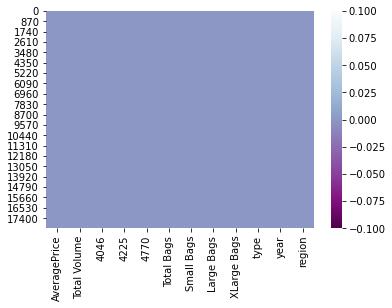

In [12]:
#checking missing values again 
sns.heatmap(df.isnull(),cmap="BuPu_r")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


In [14]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [15]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

In [16]:
from sklearn.preprocessing import LabelEncoder

column_list=[]
for i in df:
    column_list.append (i)
column_list

#encoding all the columns 
le=LabelEncoder()

for val in column_list:
    df[val]=le.fit_transform(df[val].astype(str))
    #astype describes that the data present are in str format
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,86,14553,331,13781,8276,16743,15964,14619,0,0,0,0
1,88,13299,14522,11961,9182,17659,16795,14880,0,0,0,0
2,46,1383,15849,636,1629,16130,15288,241,0,0,0,0
3,61,16346,1032,15830,10363,12768,11859,1955,0,0,0,0
4,81,12763,17238,11788,10559,13336,12365,4544,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,116,4209,5833,3107,0,2571,1985,9743,0,1,3,53
18245,124,2650,1452,9660,0,17406,16344,7765,0,1,3,53
18246,140,2569,1453,6838,10402,17542,16750,9549,0,1,3,53
18247,146,3836,3531,8482,10400,836,683,10660,0,1,3,53


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   AveragePrice  18249 non-null  int32
 1   Total Volume  18249 non-null  int32
 2   4046          18249 non-null  int32
 3   4225          18249 non-null  int32
 4   4770          18249 non-null  int32
 5   Total Bags    18249 non-null  int32
 6   Small Bags    18249 non-null  int32
 7   Large Bags    18249 non-null  int32
 8   XLarge Bags   18249 non-null  int32
 9   type          18249 non-null  int32
 10  year          18249 non-null  int32
 11  region        18249 non-null  int32
dtypes: int32(12)
memory usage: 855.5 KB


In [18]:
df.skew()

AveragePrice    0.577300
Total Volume   -0.000127
4046            0.001769
4225            0.000249
4770            0.434847
Total Bags      0.000124
Small Bags      0.004342
Large Bags      0.105801
XLarge Bags     1.521652
type            0.000329
year            0.215339
region          0.000030
dtype: float64

AveragePrice       AxesSubplot(0.125,0.536818;0.110714x0.343182)
Total Volume    AxesSubplot(0.257857,0.536818;0.110714x0.343182)
4046            AxesSubplot(0.390714,0.536818;0.110714x0.343182)
4225            AxesSubplot(0.523571,0.536818;0.110714x0.343182)
4770            AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Total Bags      AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Small Bags            AxesSubplot(0.125,0.125;0.110714x0.343182)
Large Bags         AxesSubplot(0.257857,0.125;0.110714x0.343182)
XLarge Bags        AxesSubplot(0.390714,0.125;0.110714x0.343182)
type               AxesSubplot(0.523571,0.125;0.110714x0.343182)
year               AxesSubplot(0.656429,0.125;0.110714x0.343182)
region             AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

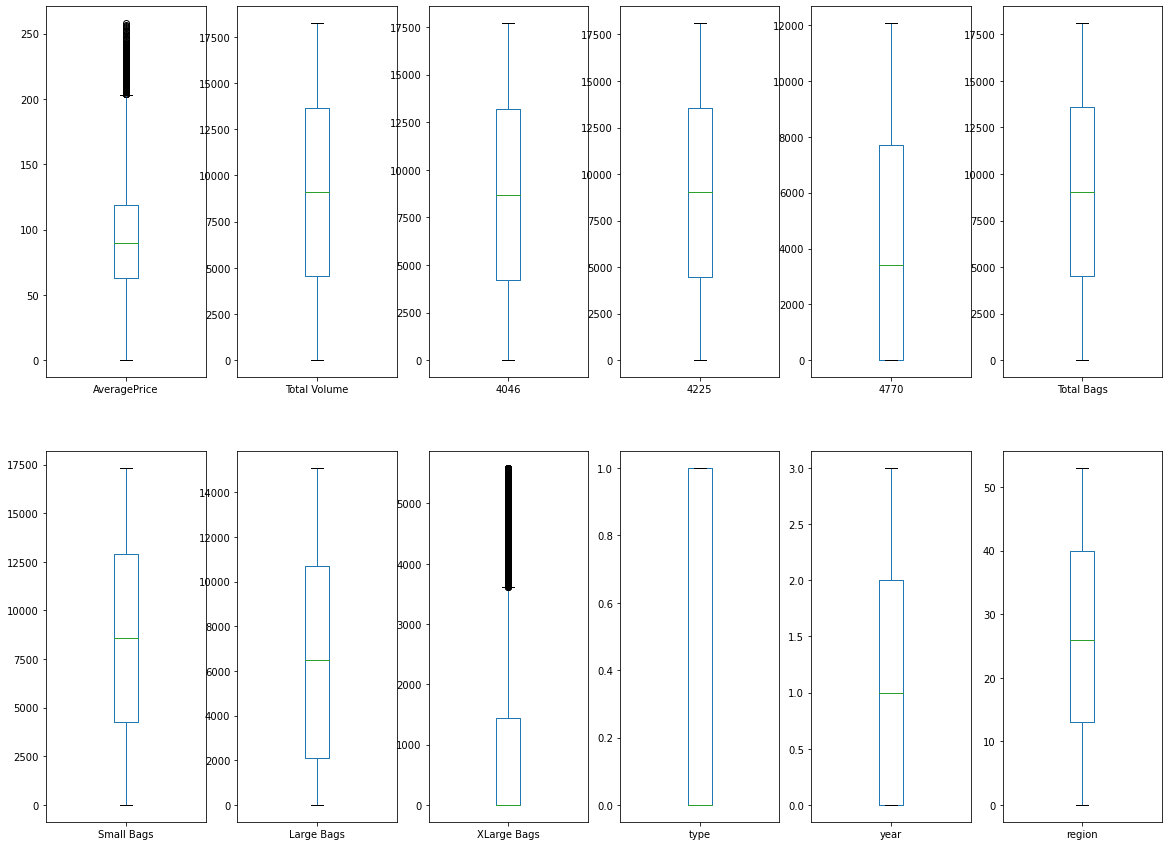

In [19]:
# to have all box plots in the same viz
df.plot(kind="box",subplots=True,layout=(2,6) , figsize=(20,15))

0.5773001738276418


<AxesSubplot:xlabel='AveragePrice'>

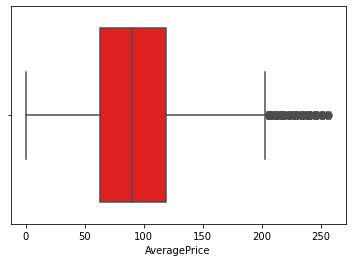

In [20]:
print(df["AveragePrice"].skew())
sns.boxplot(df["AveragePrice"],color="r")

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

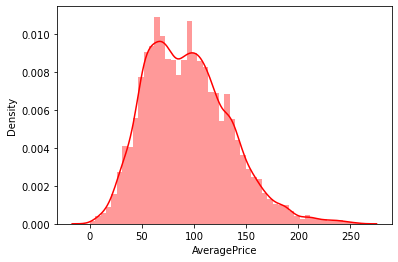

In [21]:
sns.distplot(df["AveragePrice"],color="r")

1.5216518169135278


<AxesSubplot:xlabel='XLarge Bags'>

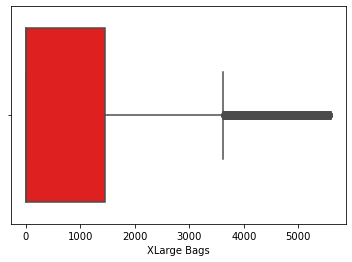

In [22]:
print(df["XLarge Bags"].skew())
sns.boxplot(df["XLarge Bags"],color="r")

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

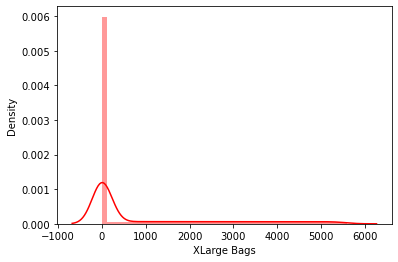

In [23]:
sns.distplot(df["XLarge Bags"],color="r")

In [24]:
#identifying outliers 
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.18868869, 1.03235668, 1.61737754, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       [0.13900282, 0.7941363 , 1.12028078, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       [1.18240612, 1.4695272 , 1.37627913, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       ...,
       [1.15282984, 1.24422467, 1.40092679, ..., 1.00016441, 1.97050371,
        1.70081131],
       [1.30188745, 1.00353471, 1.00004919, ..., 1.00016441, 1.97050371,
        1.70081131],
       [0.53175644, 0.89886211, 0.08370242, ..., 1.00016441, 1.97050371,
        1.70081131]])

In [25]:
df.shape

(18249, 12)

In [26]:
#keeping the raw data and creating a new dataframe
dfn=df[(z<3).all(axis=1)]

In [27]:
dfn.shape

(18118, 12)

Observation 
less than 1% data lost in removing outliers 

0.4003227181716069


<AxesSubplot:xlabel='AveragePrice'>

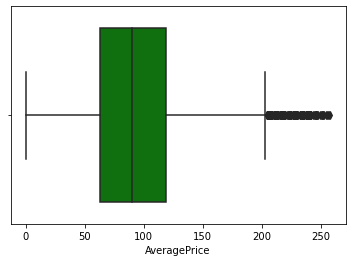

In [28]:
print(dfn["AveragePrice"].skew())
sns.boxplot(df["AveragePrice"],color="g")

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

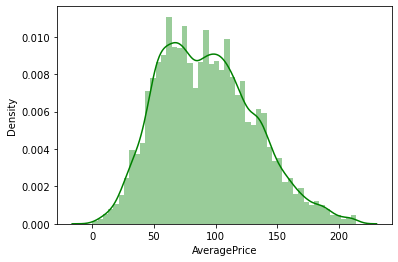

In [29]:
sns.distplot(dfn["AveragePrice"],color="g")

1.5145053371397725


<AxesSubplot:xlabel='XLarge Bags'>

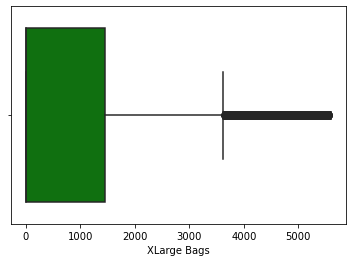

In [30]:
print(dfn["XLarge Bags"].skew())
sns.boxplot(df["XLarge Bags"],color="g")

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

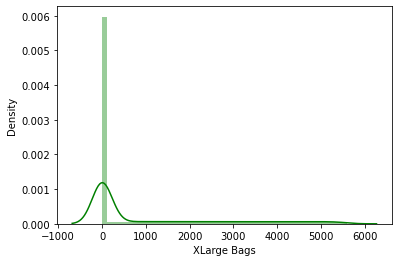

In [31]:
sns.distplot(dfn["XLarge Bags"],color="g")

1.5145053371397725


1.0707627552867298

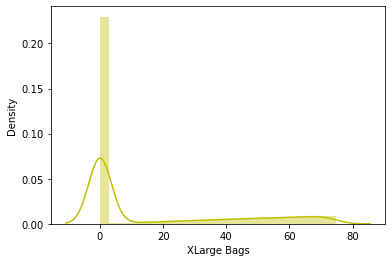

In [32]:
print(dfn["XLarge Bags"].skew())
dfn["XLarge Bags"]=np.sqrt(dfn["XLarge Bags"] )
sns.distplot(dfn["XLarge Bags"],color="y")
dfn["XLarge Bags"].skew()


1.0707627552867298


0.8304421406047816

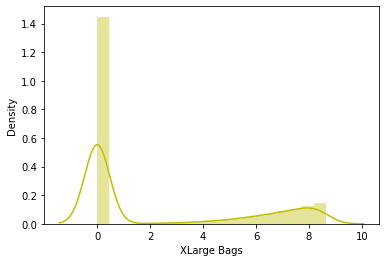

In [33]:
print(dfn["XLarge Bags"].skew())
dfn["XLarge Bags"]=np.sqrt(dfn["XLarge Bags"])
sns.distplot(dfn["XLarge Bags"],color="y")
dfn["XLarge Bags"].skew()

0.8304421406047816


0.7247447490713275

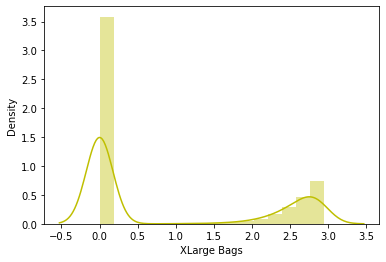

In [34]:
print(dfn["XLarge Bags"].skew())
dfn["XLarge Bags"]=np.sqrt(dfn["XLarge Bags"])
sns.distplot(dfn["XLarge Bags"],color="y")
dfn["XLarge Bags"].skew()

In [35]:
dfn.skew()

AveragePrice    0.400323
Total Volume   -0.005693
4046            0.000124
4225            0.001803
4770            0.429762
Total Bags     -0.002065
Small Bags      0.002575
Large Bags      0.103957
XLarge Bags     0.724745
type            0.014794
year            0.224198
region          0.006878
dtype: float64

AveragePrice       AxesSubplot(0.125,0.536818;0.110714x0.343182)
Total Volume    AxesSubplot(0.257857,0.536818;0.110714x0.343182)
4046            AxesSubplot(0.390714,0.536818;0.110714x0.343182)
4225            AxesSubplot(0.523571,0.536818;0.110714x0.343182)
4770            AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Total Bags      AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Small Bags            AxesSubplot(0.125,0.125;0.110714x0.343182)
Large Bags         AxesSubplot(0.257857,0.125;0.110714x0.343182)
XLarge Bags        AxesSubplot(0.390714,0.125;0.110714x0.343182)
type               AxesSubplot(0.523571,0.125;0.110714x0.343182)
year               AxesSubplot(0.656429,0.125;0.110714x0.343182)
region             AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

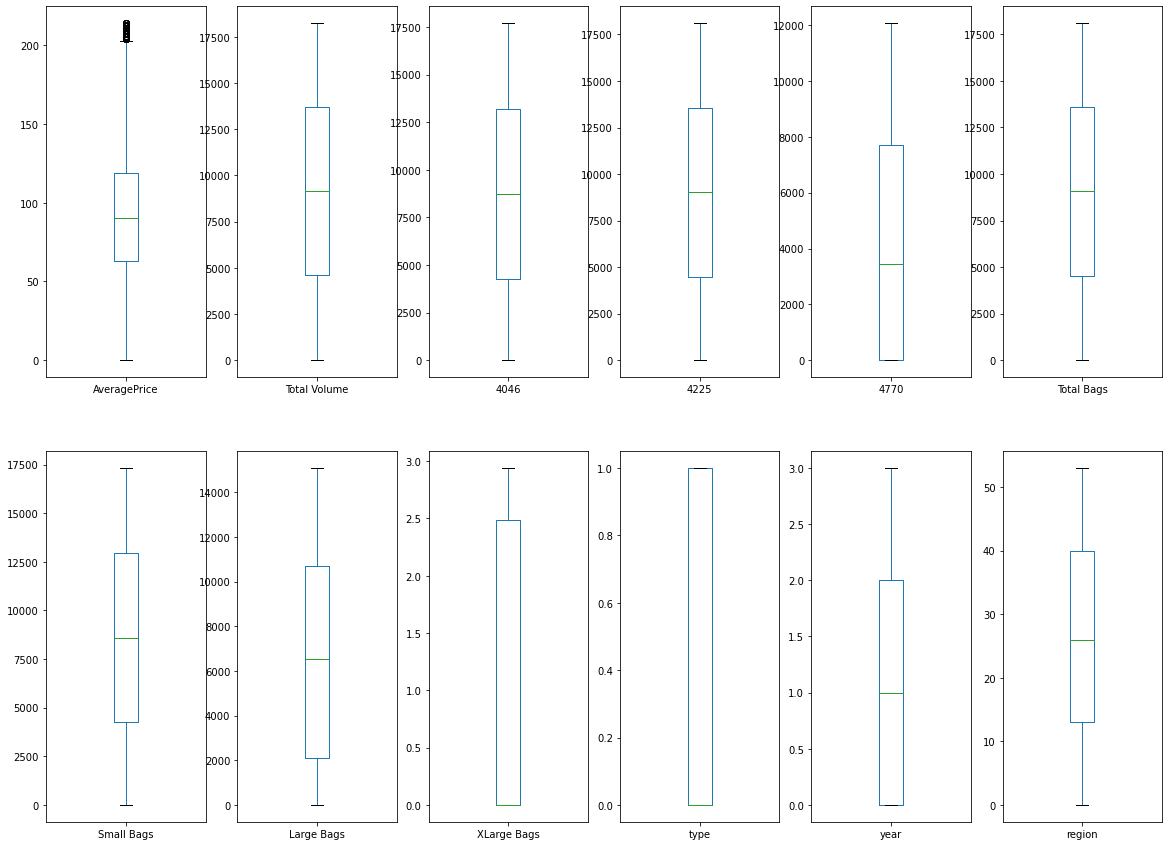

In [36]:
# to have all box plots in the same viz
dfn.plot(kind="box",subplots=True,layout=(2,6) , figsize=(20,15))

### Working towards classification problem 

In [37]:
cor=dfn.corr()
round(cor,3) 

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000,-0.022,-0.032,0.018,-0.231,-0.001,-0.041,-0.158,-0.415,0.620,0.085,-0.025
Total Volume,-0.022,1.000,-0.101,-0.108,0.010,-0.091,-0.038,0.000,0.040,-0.055,-0.015,0.089
4046,-0.032,-0.101,1.000,0.021,0.042,-0.008,-0.026,0.023,-0.001,-0.019,-0.005,-0.103
4225,0.018,-0.108,0.021,1.000,0.033,0.012,0.031,0.033,-0.046,-0.001,0.016,-0.097
4770,-0.231,0.010,0.042,0.033,1.000,0.022,0.053,0.118,0.292,-0.443,-0.009,0.046
Total Bags,-0.001,-0.091,-0.008,0.012,0.022,1.000,0.465,0.036,-0.002,-0.044,-0.029,0.009
Small Bags,-0.041,-0.038,-0.026,0.031,0.053,0.465,1.000,0.022,0.042,-0.098,0.003,0.028
Large Bags,-0.158,0.000,0.023,0.033,0.118,0.036,0.022,1.000,0.148,-0.177,0.090,0.009
XLarge Bags,-0.415,0.040,-0.001,-0.046,0.292,-0.002,0.042,0.148,1.000,-0.678,0.157,0.016
type,0.620,-0.055,-0.019,-0.001,-0.443,-0.044,-0.098,-0.177,-0.678,1.000,-0.004,-0.004


<AxesSubplot:>

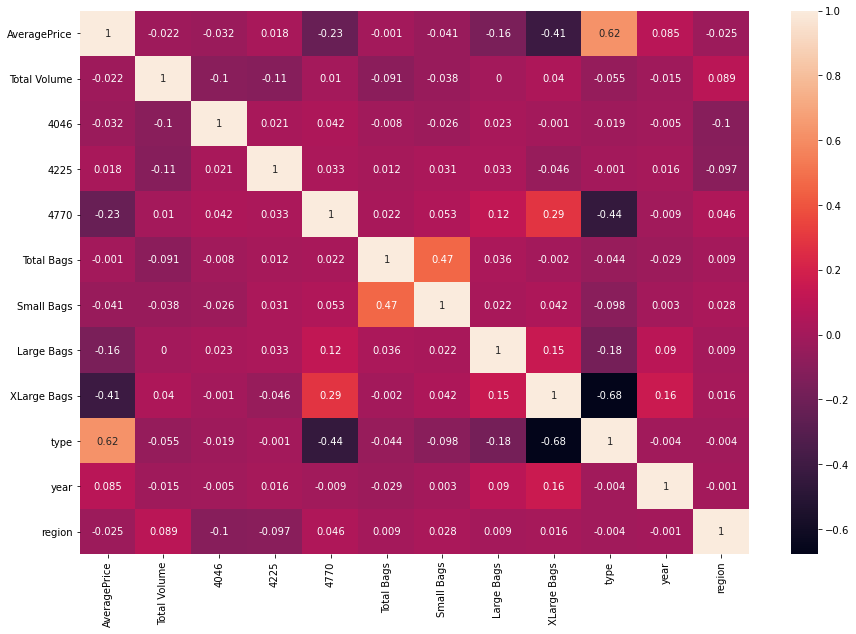

In [38]:
plt.figure(figsize=(15,10))
sns.heatmap(round(cor,3),annot=True)

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(ds):
    vif=pd.DataFrame()
    vif["variables"]=ds.columns
    vif["VIF FACTOR"]=[variance_inflation_factor (ds.values,i) for i in range (ds.shape[1])]
    return (vif)

calc_vif(dfn)

,variables,VIF FACTOR
0,AveragePrice,9.786880
1,Total Volume,3.581783
2,4046,3.414236
3,4225,3.607161
4,4770,2.520495
5,Total Bags,4.927538
6,Small Bags,4.877887
7,Large Bags,2.882938
8,XLarge Bags,2.637204
9,type,5.362504


In [40]:
dfn.drop("AveragePrice",axis=1,inplace=True)

In [41]:
dfn

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,14553,331,13781,8276,16743,15964,14619,0.0,0,0,0
1,13299,14522,11961,9182,17659,16795,14880,0.0,0,0,0
2,1383,15849,636,1629,16130,15288,241,0.0,0,0,0
3,16346,1032,15830,10363,12768,11859,1955,0.0,0,0,0
4,12763,17238,11788,10559,13336,12365,4544,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,4209,5833,3107,0,2571,1985,9743,0.0,1,3,53
18245,2650,1452,9660,0,17406,16344,7765,0.0,1,3,53
18246,2569,1453,6838,10402,17542,16750,9549,0.0,1,3,53
18247,3836,3531,8482,10400,836,683,10660,0.0,1,3,53


<AxesSubplot:>

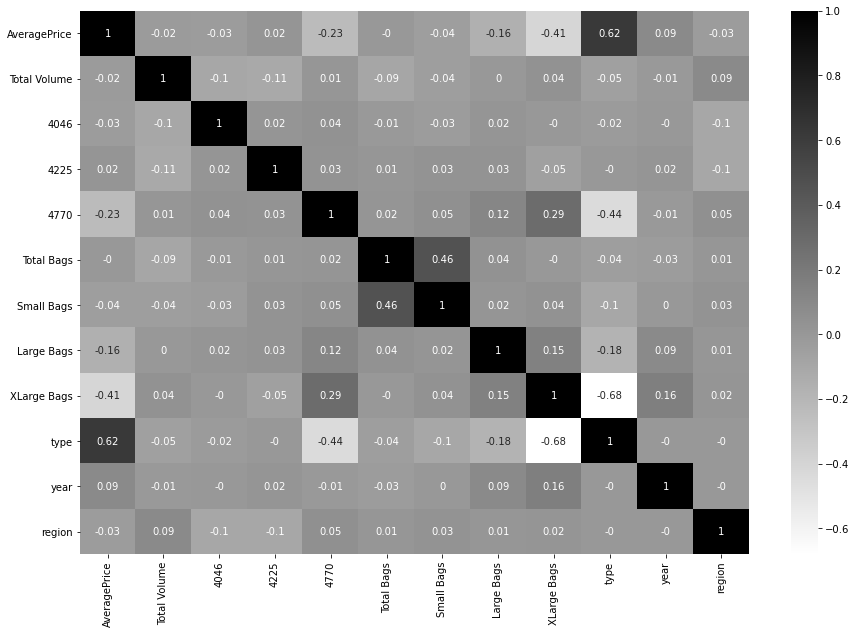

In [42]:
plt.figure(figsize=(15,10))
sns.heatmap(round(cor,2),annot=True,cmap="binary")

In [43]:
# splitting target 
x=df.drop("region",axis=1)
y=df["region"]


In [44]:
from sklearn.model_selection import train_test_split 

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#saving best random state 
maxAccuracy=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccuracy:
        maxAccuracy=accu
        maxRS=i

print("best accuracy  is ",maxAccuracy, "with random state ",maxRS)


#note- code running before using PCA 

best accuracy  is  0.4957077625570776 with random state  117


In [46]:
dfn.shape

(18118, 11)

In [47]:
from sklearn.decomposition import PCA
PCa=PCA(n_components=9)

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=117)

In [49]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 

DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
acc1=classification_report(y_test,pred)
print(acc1)

              precision    recall  f1-score   support

           0       0.44      0.44      0.44       100
           1       0.40      0.47      0.43       103
           2       0.61      0.55      0.57        99
           3       0.52      0.49      0.50       104
           4       0.50      0.59      0.55        91
           5       0.47      0.45      0.46       108
           6       0.58      0.55      0.57        94
           7       0.57      0.61      0.59       103
           8       0.59      0.62      0.61       106
           9       0.51      0.50      0.51        88
          10       0.41      0.36      0.38        98
          11       0.50      0.56      0.53       106
          12       0.62      0.58      0.60       109
          13       0.50      0.51      0.50       112
          14       0.26      0.30      0.28        90
          15       0.50      0.53      0.51       104
          16       0.54      0.50      0.52       102
          17       0.63    

In [50]:
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier()
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
acc2=classification_report(y_test,pred)
print(acc2)

              precision    recall  f1-score   support

           0       0.71      0.64      0.67       100
           1       0.64      0.75      0.69       103
           2       0.74      0.79      0.76        99
           3       0.75      0.60      0.66       104
           4       0.72      0.87      0.79        91
           5       0.76      0.67      0.71       108
           6       0.66      0.69      0.67        94
           7       0.68      0.74      0.71       103
           8       0.79      0.79      0.79       106
           9       0.68      0.83      0.74        88
          10       0.62      0.65      0.63        98
          11       0.63      0.76      0.69       106
          12       0.72      0.78      0.75       109
          13       0.64      0.63      0.64       112
          14       0.59      0.49      0.53        90
          15       0.76      0.76      0.76       104
          16       0.77      0.70      0.73       102
          17       0.77    

In [51]:
from sklearn.svm import SVC

SVCc=SVC()
SVCc.fit(x_train,y_train)
pred=SVCc.predict(x_test)
acc3=classification_report(y_test,pred)
print(acc3)

              precision    recall  f1-score   support

           0       0.30      0.35      0.32       100
           1       0.23      0.32      0.27       103
           2       0.29      0.42      0.34        99
           3       0.38      0.23      0.29       104
           4       0.20      0.32      0.25        91
           5       0.40      0.25      0.31       108
           6       0.29      0.29      0.29        94
           7       0.29      0.32      0.31       103
           8       0.44      0.54      0.49       106
           9       0.23      0.49      0.31        88
          10       0.15      0.41      0.22        98
          11       0.25      0.41      0.31       106
          12       0.33      0.42      0.37       109
          13       0.19      0.22      0.20       112
          14       0.21      0.18      0.19        90
          15       0.35      0.35      0.35       104
          16       0.24      0.33      0.28       102
          17       0.41    

In [52]:
from sklearn.neighbors import KNeighborsClassifier

KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
pred=KNN.predict(x_test)
acc3=classification_report(y_test,pred)
print(acc3)

              precision    recall  f1-score   support

           0       0.27      0.38      0.31       100
           1       0.32      0.54      0.40       103
           2       0.37      0.54      0.43        99
           3       0.33      0.41      0.37       104
           4       0.33      0.59      0.42        91
           5       0.28      0.32      0.30       108
           6       0.37      0.53      0.44        94
           7       0.45      0.62      0.52       103
           8       0.53      0.60      0.57       106
           9       0.40      0.56      0.47        88
          10       0.32      0.46      0.38        98
          11       0.40      0.58      0.47       106
          12       0.50      0.57      0.53       109
          13       0.35      0.34      0.35       112
          14       0.31      0.32      0.32        90
          15       0.47      0.56      0.51       104
          16       0.35      0.36      0.36       102
          17       0.32    

In [57]:
# Cross validation
from sklearn.model_selection import cross_val_score

models=(KNN,DTC,SVCc,RF)
for i in models:
    print (i , cross_val_score(i,x,y,cv=2).mean()*100)

    
# keeping cv=2  after checking result of cv=15

KNeighborsClassifier() 1.7644832535597823
DecisionTreeClassifier() 1.6493991460126236
SVC() 1.813804327590038
RandomForestClassifier() 1.8247710388978637


In [58]:
from sklearn.model_selection import GridSearchCV

### using  hyper parameter 

In [59]:
parameters={"max_features":["auto","sqrt","log2"],
            "criterion":["gini","entropy"],
            "n_estimators":np.arange(1,10),
           "max_depth":np.arange(1,10)}

In [63]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=2)
#keeping the cv low to avoid delay 
#change in cv score was gradual 

In [64]:
RF.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [65]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [66]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'sqrt',
 'n_estimators': 9}

In [71]:
region_model=RandomForestClassifier(criterion="entropy",max_depth=9,max_features="sqrt",n_estimators=9)
region_model.fit(x_train,y_train)
pred=region_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print (acc*100)

50.757990867579906


In [72]:
region_model2=RandomForestClassifier()
region_model2.fit(x_train,y_train)
pred=region_model2.predict(x_test)
acc=accuracy_score(y_test,pred)
print (acc*100)

69.7351598173516


In [73]:
import joblib
joblib.dump(region_model2,"Region_model.pkl")

['Region_model.pkl']

### Working towards classification problem 

In [75]:
dfm=df[(z<3).all(axis=1)]

In [76]:
df.sample()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
3236,136,12754,10152,8847,11562,14547,12052,11045,324,0,1,8


In [77]:
# splitting target 
x1=df.drop("AveragePrice",axis=1)
y1=df["AveragePrice"]


<AxesSubplot:>

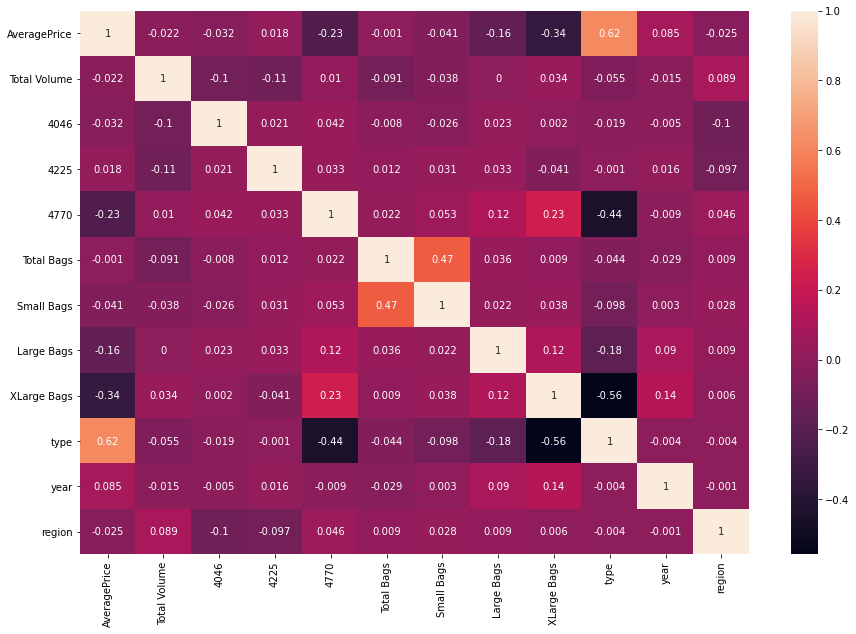

In [83]:
cor2=dfm.corr()

plt.figure(figsize=(15,10))
sns.heatmap(round(cor2,3),annot=True)

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=117)

In [92]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import ElasticNet

In [93]:
#linear regression 
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
lm_score=lm.score(x_train,y_train)*100
lm_score

39.64885628096664

In [94]:
#Lasso 
ls=Lasso(alpha=0.000001)
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
ls_score=ls.score(x_train,y_train)*100
ls_score

39.648856280966186

In [95]:
#Ridge 
rd=Ridge(alpha=0.000001)
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
rd_score=rd.score(x_train,y_train)*100
rd_score

39.64885628096664

In [96]:
#elastic net
en=ElasticNet(alpha=0.000001)
en.fit(x_train,y_train)
pred=en.predict(x_test)
en_score=en.score(x_train,y_train)*100
en_score

39.64885628067387

In [118]:
print ("lm",lm_score)
print ("rd",rd_score)
print ("ls",ls_score)

print ("en",en_score)

lm 39.64885628096664
rd 39.64885628096664
ls 39.648856280966186
en 39.64885628067387


In [101]:
models=(lm,rd,ls,en)
for i in models:
    print (i , cross_val_score(i,x,y,cv=5).mean()*100)

LinearRegression() -35.687513796701516
Ridge(alpha=1e-06) -35.68751378733626
Lasso(alpha=1e-06) -35.687481820557856
ElasticNet(alpha=1e-06) -35.68742945256939


In [122]:
from sklearn.model_selection import GridSearchCV

parameters={"solver":["auto","svd","lsqr","saga"],
            "copy_X":["true","false"],
             "random_state":np.arange(1,50),
           "max_iter":np.arange(1,5)}

In [124]:
GCV=GridSearchCV(Ridge(),parameters,cv=2)

In [125]:
rd.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])

In [126]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=Ridge(),
             param_grid={'copy_X': ['true', 'false'],
                         'max_iter': array([1, 2, 3, 4]),
                         'random_state': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'solver': ['auto', 'svd', 'lsqr', 'saga']})

In [127]:
GCV.best_params_

{'copy_X': 'true', 'max_iter': 1, 'random_state': 1, 'solver': 'svd'}

In [128]:
price_model=Ridge(copy_X="True", max_iter= 1, random_state=1,solver= 'svd')
price_model.fit(x_train ,y_train)
pred=price_model.predict(x_test)
scoree=price_model.score(x_train,y_train)
print(scoree*100)

39.648849377804076


In [129]:
import joblib
joblib.dump(price_model,"Price_model.pkl")

['Price_model.pkl']